<a href="https://colab.research.google.com/github/Onur-Caliskan/Predict-Wine-Quality/blob/main/CMPE407_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CMPE 407 PROJECT

Emine Esin Yılmaz : 120200059
Onur Çalışkan : 119200059



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.display import display

##Reading the Dataset

In [ ]:
data = pd.read_csv('/content/winequality-red .csv', sep=';')

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
print(data.isna().sum().sum()) #to check how many empty values are there in the dataset

0


## Plotting Different Features

<Axes: xlabel='quality', ylabel='count'>

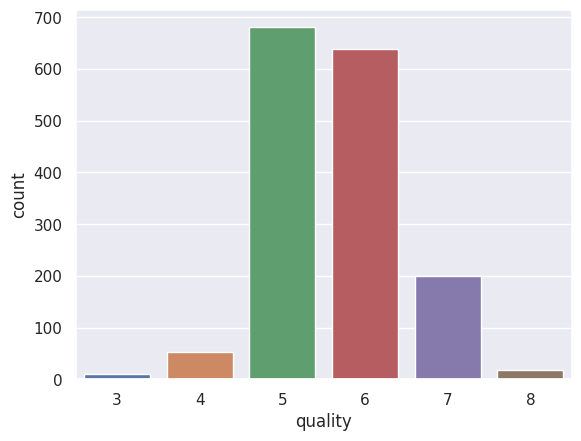

In [ ]:
sns.countplot(x ='quality', data = data)

<Axes: xlabel='quality', ylabel='citric acid'>

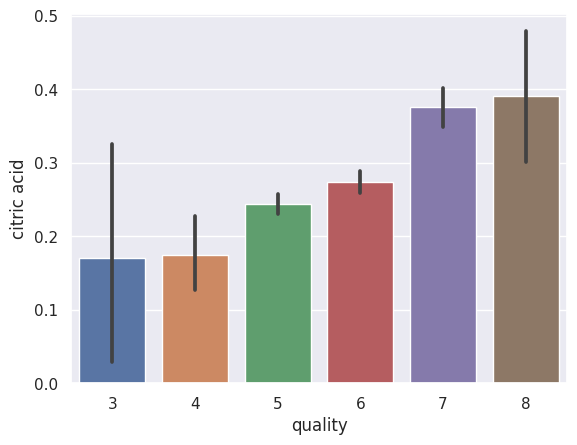

In [ ]:
sns.barplot(x='quality', y='citric acid', data=data)

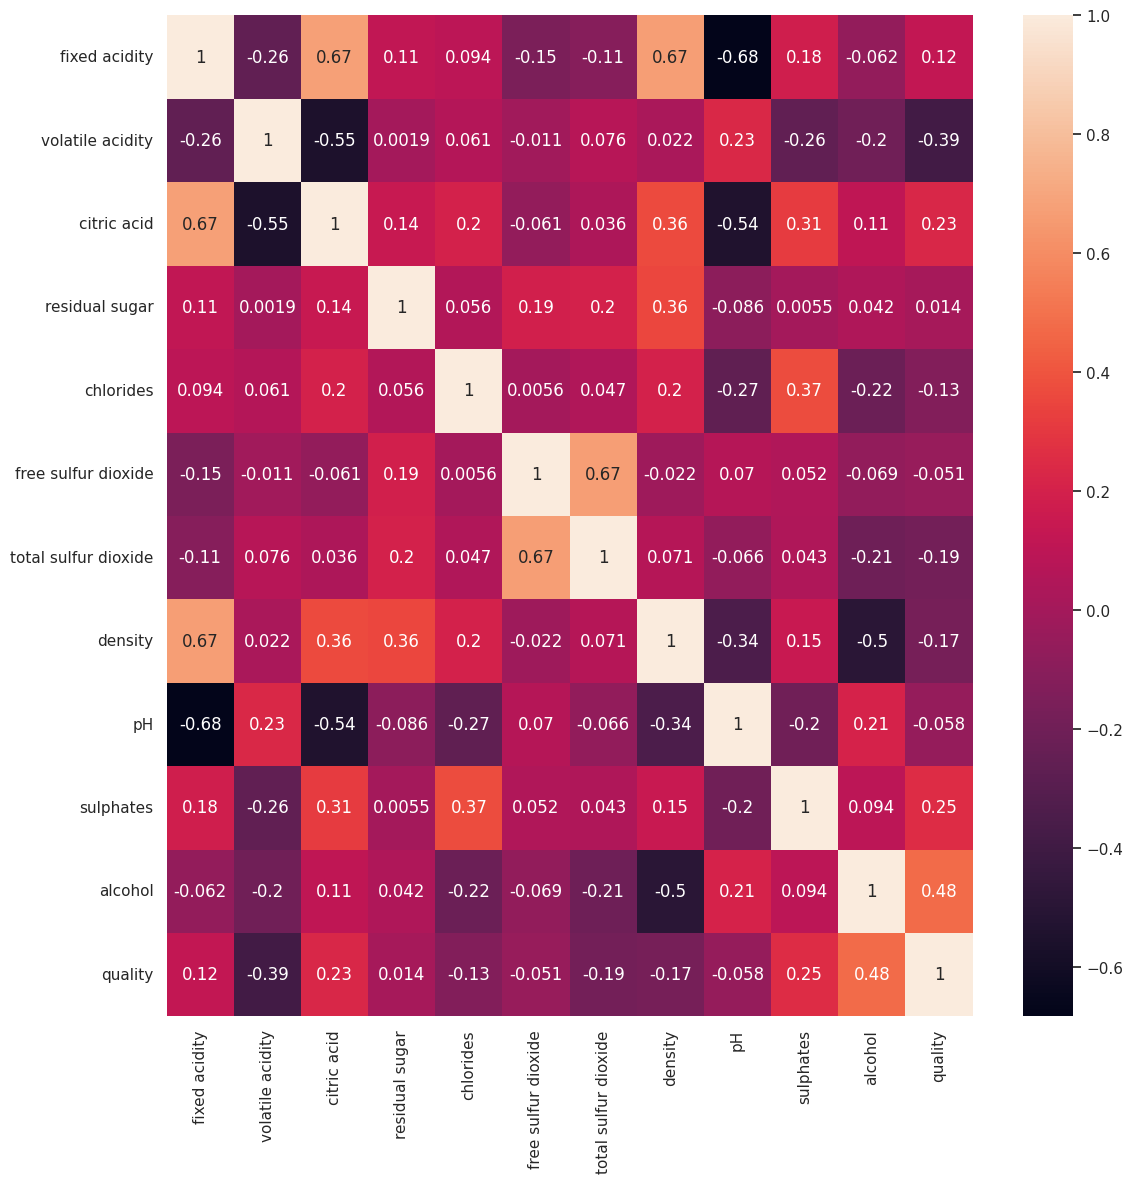

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(), annot=True)
plt.show()

<Axes: xlabel='quality', ylabel='chlorides'>

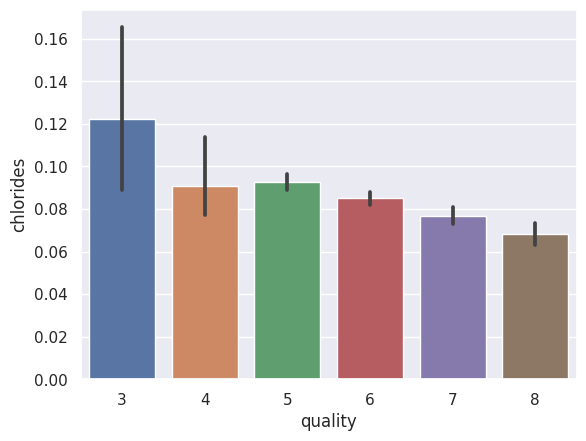

In [ ]:
sns.barplot(x='quality', y='chlorides', data=data)

##Pre-processing Steps

In [ ]:
features = [feature for feature in data.columns if feature != 'quality']
label = 'quality'

X = data[features].values
y = data[label].values

In [ ]:
print(X[:5])

[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]


In [ ]:
# Normalization / standardization
X = (X - X.mean()) / X.std()

In [ ]:
print(X[:5])

[[-0.04389548 -0.44445665 -0.48630632 -0.37271435 -0.48176264  0.17133142
   1.54639215 -0.4266526  -0.2764601  -0.45282658  0.07567502]
 [-0.01998138 -0.4336953  -0.48630632 -0.33086467 -0.48044737  1.0083249
   3.51930537 -0.42671239 -0.29499353 -0.44565235  0.09958912]
 [-0.01998138 -0.44086953 -0.48391491 -0.34880025 -0.48080608  0.41047241
   2.74209713 -0.42670043 -0.29140641 -0.44744591  0.09958912]
 [ 0.18328847 -0.46956645 -0.45282658 -0.37271435 -0.48182243  0.53004291
   3.10080862 -0.42664064 -0.29738494 -0.45163088  0.09958912]
 [-0.04389548 -0.44445665 -0.48630632 -0.37271435 -0.48176264  0.17133142
   1.54639215 -0.4266526  -0.2764601  -0.45282658  0.07567502]]


##Feature Selection

Feature Selection (Manually Selecting)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
feature_selection  = SelectKBest(score_func=f_classif, k=5)  # Select the top 5 features
feature_selection.fit(X, y)

SelectKBest(k=5)

In [ ]:
transformedX = feature_selection.transform(X)
print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")

Old Shape: (1599, 11) New shape: (1599, 5)


In [ ]:
feature_selection.scores_,  feature_selection.pvalues_


(array([  6.28308116,  60.91399283,  19.69066447,   1.05337358,
          6.03563859,   4.7542331 ,  25.47850952,  13.39635639,
          4.3417643 ,  22.27337609, 115.85479747]),
 array([8.79396662e-006, 3.32646506e-058, 4.42109157e-019, 3.84618775e-001,
        1.52653903e-005, 2.57082723e-004, 8.53359845e-025, 8.12440427e-013,
        6.28438870e-004, 1.22589009e-021, 1.20989516e-104]))

In [ ]:
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

Selected features:  ['volatile acidity' 'citric acid' 'total sulfur dioxide' 'sulphates'
 'alcohol']


Feature Selection (Automatically Selecting)


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Using decision tree classifier,
feature_selection = SelectFromModel(DecisionTreeClassifier())
feature_selection.fit(X, y)

transformedX = feature_selection.transform(X)
print(f"New shape: {transformedX.shape}")

New shape: (1599, 4)


In [ ]:
print("Selected features: ", feature_selection.get_support())
print("Selected features: ", np.array(features)[feature_selection.get_support(indices=True)])

Selected features:  [False  True False False False False  True False False  True  True]
Selected features:  ['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']


The manually selected features and the autoomatically selected features had 4 features in common out of 5. Because of that, we proceeded with the automatically selected features which consist the 4 in common and 1 different from manulally selected.

##Split dataset with K-Fold method and fit in model for training.**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=7)

accuracies_trim = []
accuracies_trim2 = []
accuracies_trim3 = []
accuracies_trim4 = []
accuracies_trim5 = []

for train, test in cv.split(transformedX):
  model_trim = DecisionTreeClassifier()
  model_trim.fit(transformedX[train], y[train]) # with selected features
  scr = model_trim.score(transformedX[test], y[test])
  accuracies_trim.append(scr)

  model_trim2 = GaussianNB()
  model_trim2.fit(transformedX[train], y[train]) # with selected features
  scr2 = model_trim2.score(transformedX[test], y[test])
  accuracies_trim2.append(scr2)

  model_trim3 =RandomForestClassifier()
  model_trim3.fit(transformedX[train], y[train]) # with selected features
  scr3 = model_trim3.score(transformedX[test], y[test])
  accuracies_trim3.append(scr3)

  model_trim4 =SVC()
  model_trim4.fit(transformedX[train], y[train]) # with selected features
  scr4 = model_trim4.score(transformedX[test], y[test])
  accuracies_trim4.append(scr4)

  model_trim5 = BernoulliNB()
  model_trim5.fit(transformedX[train], y[train]) # with selected features
  scr5 = model_trim5.score(transformedX[test], y[test])
  accuracies_trim5.append(scr5)

print(f"Mean of experiment scores of Decisiontree: {np.mean(accuracies_trim)}")
print(f"Mean of experiment scores of GaussianNB: {np.mean(accuracies_trim2)}")
print(f"Mean of experiment scores of BernoulliNb: {np.mean(accuracies_trim5)}")
print(f"Mean of experiment scores of RandomForest: {np.mean(accuracies_trim3)}")
print(f"Mean of experiment scores of SVC: {np.mean(accuracies_trim4)}")


Mean of experiment scores of Decisiontree: 0.6441470125786164
Mean of experiment scores of GaussianNB: 0.5841077044025157
Mean of experiment scores of BernoulliNb: 0.4259001572327044
Mean of experiment scores of RandomForest: 0.7066941823899371
Mean of experiment scores of SVC: 0.49405660377358496


In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
cv=KFold(n_splits=10,shuffle=True,random_state=42)


accuracies2= []
precisions=[]
recalls=[]
f1s=[]
for train, test in cv.split(transformedX):
  model=RandomForestClassifier()
  model.fit(transformedX[train],y[train])

  y_pred=model.predict(transformedX[test])
  # Calculate metrics for the tuned model
  accuracy = accuracy_score(y[test], y_pred)
  accuracies2.append(accuracy)
  #Calculate Precision
  precision=precision_score(y[test], y_pred,average='weighted', zero_division=1)
  precisions.append(precision)

  #Calculate Recall Scores
  recall=recall_score(y[test], y_pred,average='macro', zero_division=1)
  recalls.append(recall)

  #Calculate f1 scores
  f1=f1_score(y[test], y_pred,average='weighted', zero_division=1)
  f1s.append(f1)


accuracy=np.mean(accuracies2)

print(f"Mean of experiment scores: {np.mean(accuracies2)} ")
print(f"Mean of precision scores: {np.mean(precisions)} ")
print(f"Mean of recall scores: {np.mean(recalls)} ")
print(f"Mean of f1 scores: {np.mean(f1s)} ")



Mean of experiment scores: 0.7067256289308176 
Mean of precision scores: 0.7108703000956298 
Mean of recall scores: 0.42815126171141865 
Mean of f1 scores: 0.6916937177248756 


Hyperparameter Tuning for the RandomForestClassifier Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#In every execution we get different accuracy values. We accidentally ran the code after getting the best acc result. Because of that
#the saved ipynb version may give different result than the one we included in the report.


parameters={'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
     }

random_search = RandomizedSearchCV(RandomForestClassifier(), parameters, scoring='accuracy', cv=8,  random_state=42)
random_search.fit(transformedX[train],y[train])
y_pred_tuned = random_search.predict(transformedX[test])

# Calculate metrics for the tuned model
accuracy_tuned = accuracy_score(y[test], y_pred_tuned)
precision_tuned = precision_score(y[test], y_pred_tuned, average='weighted')
recall_tuned=recall_score(y[test], y_pred_tuned ,average='weighted')
f1_tuned = f1_score(y[test], y_pred_tuned, average='weighted')

print("Accuracy (tuned):", accuracy_tuned)
print("Precision (tuned):", precision_tuned)
print("Recall (tuned):", recall_tuned)
print("F1 score (tuned):", f1_tuned)

Accuracy (tuned): 0.6792452830188679
Precision (tuned): 0.6393388814772462
Recall (tuned): 0.6792452830188679
F1 score (tuned): 0.654890998907979


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

print(f"Best Estimator: {random_search.best_estimator_}")
print(f"Best Parameter: {random_search.best_params_}")

Best Estimator: RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=200)
Best Parameter: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


Tuning the DecisionTreeClassifier Model

In [ ]:

parameters2= {
    'max_depth': range(1, 5),
    'min_samples_split': range(2, 8),
    'min_samples_leaf': range(2, 8)
}

random_search2 = GridSearchCV(DecisionTreeClassifier(), parameters2,  cv=8)
random_search2.fit(transformedX[train],y[train])
y_pred_tuned2 = random_search2.predict(transformedX[test])

# Calculate metrics for the tuned model
accuracy_tuned2 = accuracy_score(y[test], y_pred_tuned2)
precision_tuned2 = precision_score(y[test], y_pred_tuned2, average='weighted')
recall_tuned2=recall_score(y[test], y_pred_tuned2 ,average='weighted')
f1_tuned2 = f1_score(y[test], y_pred_tuned2, average='weighted')

print("Accuracy (tuned):", accuracy_tuned2)
print("Precision (tuned):", precision_tuned2)
print("Recall (tuned):", recall_tuned2)
print("F1 score (tuned):", f1_tuned2)

best_params_ = random_search2.best_params_
print("Best params: " ,best_params_)

Accuracy (tuned): 0.610062893081761
Precision (tuned): 0.5672803814161087
Recall (tuned): 0.610062893081761
F1 score (tuned): 0.587766625058887
Best params:  {'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tuning the SVC Model

In [ ]:

parameters3= {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

random_search3 = GridSearchCV(SVC(), parameters3,  cv=8)
random_search3.fit(transformedX[train],y[train])
y_pred_tuned3 = random_search3.predict(transformedX[test])

# Calculate metrics for the tuned model
accuracy_tuned3 = accuracy_score(y[test], y_pred_tuned3)
precision_tuned3 = precision_score(y[test], y_pred_tuned3, average='weighted')
recall_tuned3=recall_score(y[test], y_pred_tuned3 ,average='weighted')
f1_tuned3 = f1_score(y[test], y_pred_tuned3, average='weighted')

print("Accuracy (tuned):", accuracy_tuned3)
print("Precision (tuned):", precision_tuned3)
print("Recall (tuned):", recall_tuned3)
print("F1 score (tuned):", f1_tuned3)
best_params = random_search3.best_params_
print("Best Parameters:", best_params)

Accuracy (tuned): 0.5911949685534591
Precision (tuned): 0.48806148127764293
Recall (tuned): 0.5911949685534591
F1 score (tuned): 0.5333439481994534
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

NaiveBayes hyperparameter tuning


In [ ]:
# Define the hyperparameter grid
parameters =  {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],  # Example values for var_smoothing
}

# Create the SVC classifier
model = GaussianNB()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model,parameters, cv=5)
grid_search.fit(transformedX[train], y[train])

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(transformedX[test])

# Calculate accuracy using the best model
accuracy = accuracy_score(y[test], y_pred)

# Print the best parameters and the accuracy
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'var_smoothing': 1e-05}
Accuracy: 0.6415094339622641
